<a href="https://colab.research.google.com/github/thainta/CS115.L12/blob/main/CS115_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount drive


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.53 s (started: 2021-01-07 03:22:56 +00:00)


# Import Libraries

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np 
import os
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#Import Dataset

In [ ]:
dataset = pd.read_csv('/content/gdrive/MyDrive/SVM/Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
dataset.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


time: 16.8 ms (started: 2021-01-06 15:47:43 +00:00)


#Visualizating the Dataset

##Visualizating Column From Dataset



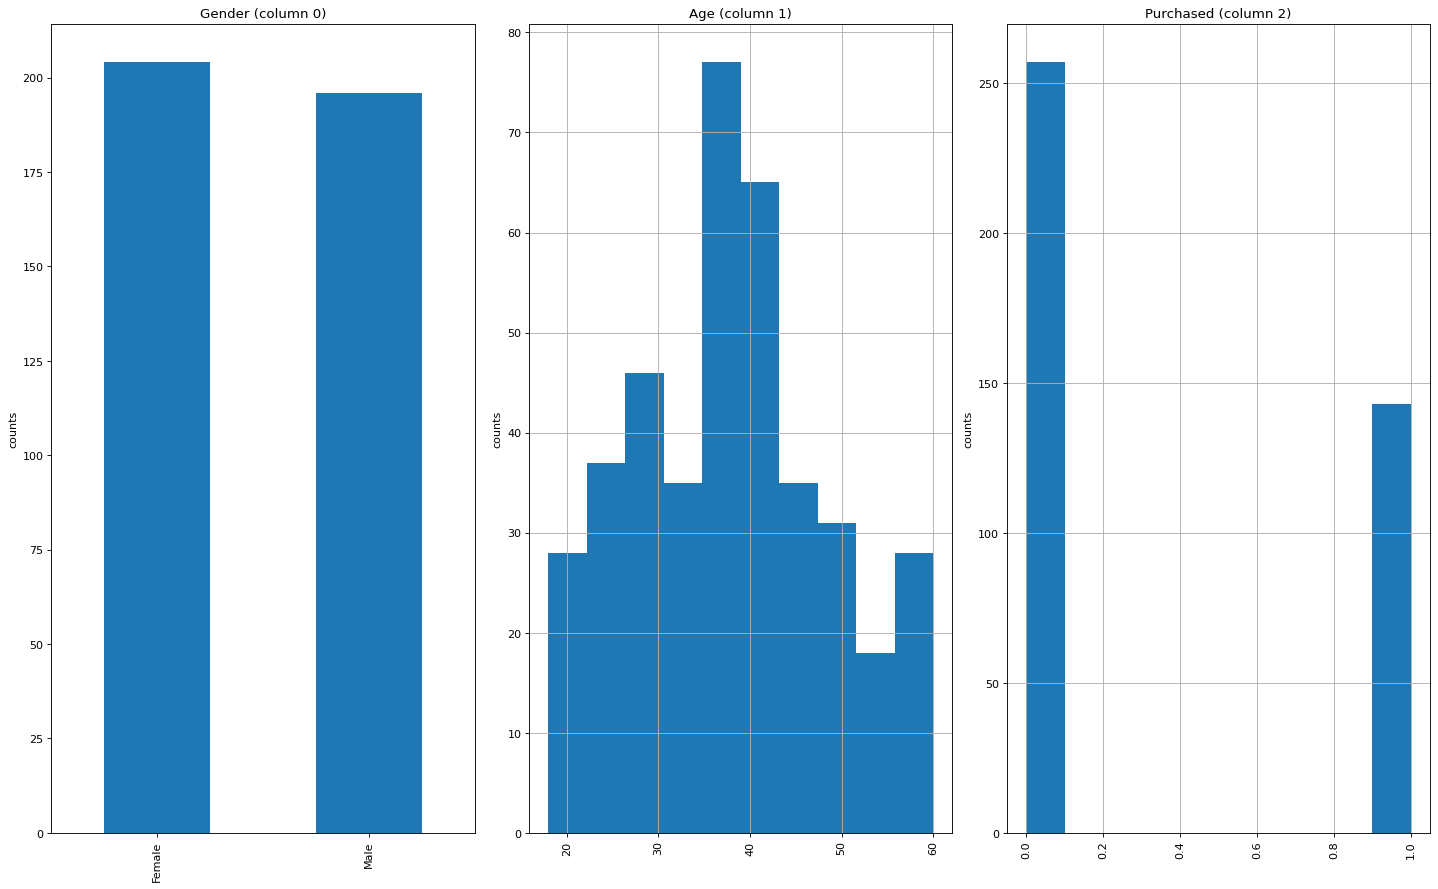

In [ ]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
dataset.dataframeName = 'Social_Network_Ads.csv'
plotPerColumnDistribution(dataset, 10, 5)

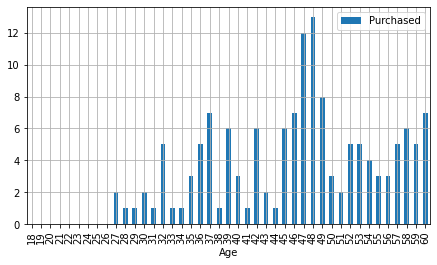

In [ ]:
d = 0;
d = {}
for i in dataset.Age:
  d[i] = 0
for i, j in zip(dataset.Age, dataset.Purchased):
  if j == 1:
    d[i]+= 1
data={'Age':[],'Purchased':[]}
for i in sorted (d) : 
    data['Age'].append(i)
    data['Purchased'].append(d[i])
# data={'Age':list(d.keys()),'Purchased':list(d.values())}
df = pd.DataFrame(data,columns=['Age','Purchased'])
df.plot(x ='Age', y='Purchased', kind = 'bar')
plt.margins()
plt.xticks(range(43))
plt.grid()
plt.gcf().subplots_adjust(left=1/30, right=1.-1/30)
plt.show()

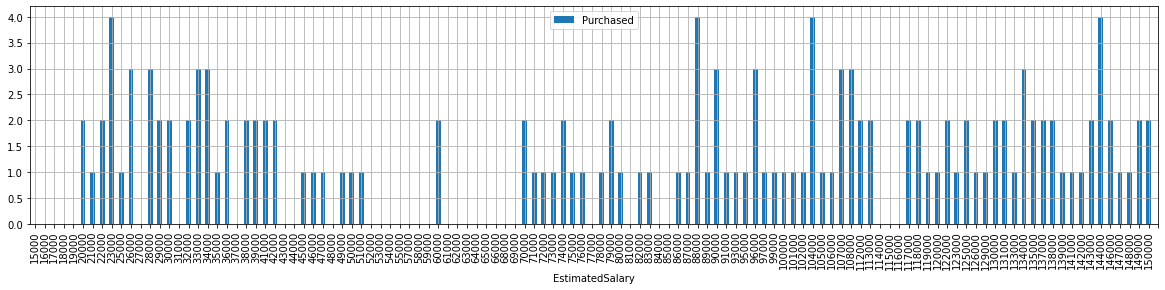

In [ ]:
d = 0;
d = {}
for i in dataset.EstimatedSalary:
  d[i] = 0
for i, j in zip(dataset.EstimatedSalary, dataset.Purchased):
  if j == 1:
    d[i]+= 1;
# for i in sorted (d) : 
#     print((i, d[i]), end =" ") 
data={'EstimatedSalary':[],'Purchased':[]}
temp=0
for i in sorted (d) : 
    data['EstimatedSalary'].append(i)
    data['Purchased'].append(d[i])
# data={'Age':list(d.keys()),'Purchased':list(d.values())}
df = pd.DataFrame(data,columns=['EstimatedSalary','Purchased'])
df.plot(x ='EstimatedSalary', y='Purchased', kind = 'bar')
plt.xticks(range(118)) # add loads of ticks
plt.grid()
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.2 # inch margin
s = maxsize/plt.gcf().dpi*118+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])
plt.show()

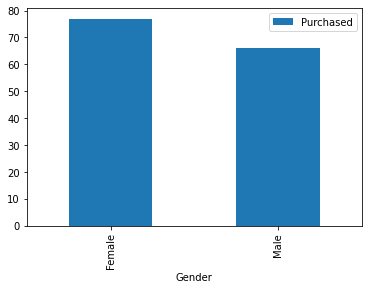

time: 189 ms (started: 2021-01-06 11:45:35 +00:00)


In [ ]:
d = 0;
d = {}
for i in dataset.Gender:
  d[i] = 0
for i, j in zip(dataset.Gender, dataset.Purchased):
  if j == 1:
    d[i]+= 1;
# for i in sorted (d) : 
#     print((i, d[i]), end =" ") 
data={'Gender':[],'Purchased':[]}
for i in sorted (d) : 
    data['Gender'].append(i)
    data['Purchased'].append(d[i])
df = pd.DataFrame(data,columns=['Gender','Purchased'])
df.plot(x ='Gender', y='Purchased', kind = 'bar')
plt.show()


##visualizating the related between properties and ads

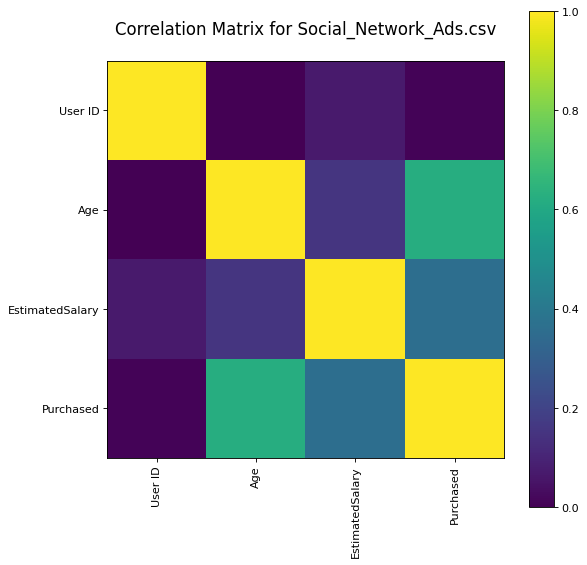

In [ ]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()
plotCorrelationMatrix(dataset, 8)

#Splitting dataset to test and train set

In [ ]:
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

#Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Create a model for SVM

##SVM with linear kernel

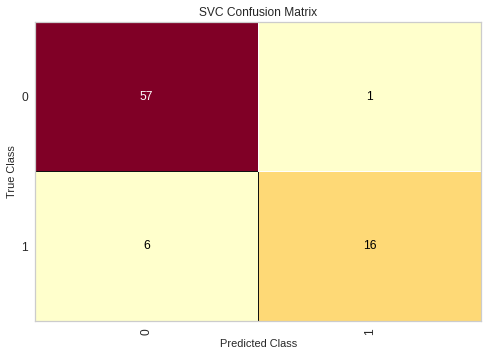

SVM with linear kernel: 0.9125


In [ ]:
classifier = SVC(kernel='linear')
classifier.fit(X_train,y_train)
#Prediction of  test data set
y_pred = classifier.predict(X_test)
#Making the confusion matrix
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(classifier, classes=[0, 1])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.poof()
score = accuracy_score(y_test, y_pred)
print('SVM with linear kernel: {}'.format(score))

##SVM with Gaussian kernel kernel

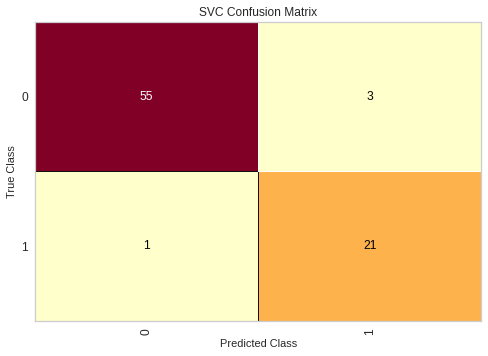

SVM with Gaussian kernel kernel: 0.95


In [ ]:
classifier = SVC(kernel='rbf', gamma=1 )
classifier.fit(X_train,y_train)
#Prediction of  test data set
y_pred = classifier.predict(X_test)
#Making the confusion matrix
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(classifier, classes=[0, 1])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.poof()
score = accuracy_score(y_test, y_pred)
print('SVM with Gaussian kernel kernel: {}'.format(score))

##Visualizating the test data set

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


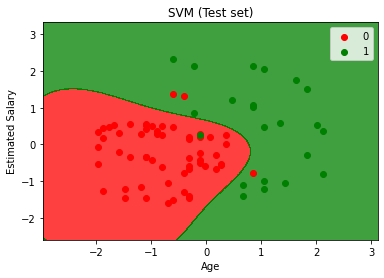

In [ ]:
from matplotlib.colors import ListedColormap
from mpl_toolkits import mplot3d
X_set,y_set = X_test,y_test
X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                    np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0],X_set[y_set == j,1], 
                c=ListedColormap(('red','green'))(i),label=j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()